In [7]:
import pandas as pd
import numpy as np
import scipy
from statsmodels.stats.multitest import multipletests
import os
import matplotlib.pyplot as plt

# compile data

In [2]:
maindir = "/lila/data/deyk/fabiha/20231112_dingyu/data"

celltypes = ["D3_sample_H", "D3_sample_H_de1", "D3_sample_H_de2", "D7_sample_I", "D7_sample_I_liver", 
             "D7_sample_I_pfg1", "D7_sample_I_pfg2",
             "D11_sample_J", "D11_sample_J_ep", "D11_sample_J_pp1", "D11_sample_J_pp2",
             "D18_sample_L", "D18_sample_L_endo", "D18_sample_L_ep", "D18_sample_L_none", "D18_sample_L_scalpha", "D18_sample_L_scbeta", "D18_sample_L_scdelta", "D18_sample_L_scec", "D18_sample_L_stromal", "D18_sample_L_unk"]


bag_genes = set()
deg = dict()
for ct in celltypes:
    print(ct)
    ko_files = os.listdir(f"{maindir}/{ct}")
    for ko_f in ko_files:
        ko = ko_f.split("_")[-4]
        df = pd.read_csv(f"{maindir}/{ct}/{ko_f}", index_col=0)
        df = df[(df["avg_log2FC"]>0.5)|(df["avg_log2FC"]<-0.5)]
        if len(df) > 0:
            print(ko_f, len(df))
            bag_genes = bag_genes.union(set(df.index))
            
            deg[f"{ct}_{ko}"] = dict(zip(df.index, df["avg_log2FC"]))
    print()

bag_genes = sorted(bag_genes)

prog_list = sorted(deg.keys())
prog_list = [i for i in prog_list if "D3" in i] + [i for i in prog_list if "D7" in i] + [i for i in prog_list if "D11" in i] + [i for i in prog_list if "D18" in i]

df = []
for g in bag_genes:
    temp = []
    for p in prog_list:
        if g in deg[p].keys():
            temp.append(deg[p][g])
        else:
            temp.append(0)
    df.append(temp)

df = pd.DataFrame(df)
df.columns = prog_list
df.index = bag_genes

D3_sample_H
all_GATA6het_vs_WT_DEG.csv 201
all_HHEX_vs_WT_DEG.csv 52
all_HHEXhet_vs_WT_DEG.csv 13
all_HNF4A_vs_WT_DEG.csv 9
all_RFX6_vs_WT_DEG.csv 13
all_PROSER1_vs_WT_DEG.csv 42
all_GATA4het_vs_WT_DEG.csv 9
all_KDM2B_vs_WT_DEG.csv 66
all_GLIS3_vs_WT_DEG.csv 156
all_BMPR1A_vs_WT_DEG.csv 124
all_NKX6-1_vs_WT_DEG.csv 16
all_GATA4_vs_WT_DEG.csv 15
all_PBX1_vs_WT_DEG.csv 134
all_MNX1_vs_WT_DEG.csv 51
all_QSER1TET1_vs_WT_DEG.csv 168
all_GATA6_vs_WT_DEG.csv 744
all_FOXA2_vs_WT_DEG.csv 512
all_BCOR_vs_WT_DEG.csv 26
all_HHEXe_vs_WT_DEG.csv 9
all_QSER1_vs_WT_DEG.csv 31
all_TLE3_vs_WT_DEG.csv 14
all_NEUROD1_vs_WT_DEG.csv 52
all_FOXA1_vs_WT_DEG.csv 18
all_TET123_vs_WT_DEG.csv 133
all_GSC_vs_WT_DEG.csv 514
all_TET1_vs_WT_DEG.csv 65
all_UBA6_vs_WT_DEG.csv 74
all_PDX1het_vs_WT_DEG.csv 495
all_HES1_vs_WT_DEG.csv 136
all_PAX6_vs_WT_DEG.csv 4
all_NGN3_vs_WT_DEG.csv 11
all_ONECUT1e_vs_WT_DEG.csv 25
all_TADA2B_vs_WT_DEG.csv 480
all_ARX_vs_WT_DEG.csv 601
all_PDX1_vs_WT_DEG.csv 206
all_OTUD5_vs_WT_DEG.csv 

In [3]:
df

,D3_sample_H_ARX,D3_sample_H_BCOR,D3_sample_H_BMPR1A,D3_sample_H_FOXA1,D3_sample_H_FOXA2,D3_sample_H_GATA4,D3_sample_H_GATA4het,D3_sample_H_GATA6,D3_sample_H_GATA6het,D3_sample_H_GLIS3,...,D18_sample_L_unk_FOXA1,D18_sample_L_unk_HNF4A,D18_sample_L_unk_MNX1,D18_sample_L_unk_NEUROD1,D18_sample_L_unk_NKX2-2,D18_sample_L_unk_NKX6-1,D18_sample_L_unk_PDX1,D18_sample_L_unk_PROSER1,D18_sample_L_unk_RFX6,D18_sample_L_unk_TLE3
A1BG,0.710425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1BG-AS1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CF,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2ML1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSWIM8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZWILCH,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZWINT,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZYG11A,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# logodds

## method

In [25]:
def logodds(y, df):
    comm_genes = list(df.index) + list(y)
    temp = []
    temp_se = []
    temp_L = []
    temp_P = []
    
    for col in df.columns:
        t0 = set(y)
        t1 = set(df[df[col]!=0].index)
        
        a = len(t0.intersection(t1))
        b = len((t1 - t0).intersection(comm_genes))
        c = len((t0 - t1).intersection(comm_genes))
        d = len(set(comm_genes) 
                - t0.intersection(t1)
                - (t1 - t0).intersection(comm_genes)
                - (t0 - t1).intersection(comm_genes))
        
        if a != 0 and b != 0 and c != 0 and d != 0:
            temp.append((a*d)/(b*c))
            se = np.sqrt(1/a + 1/b + 1/c + 1/d)
            abs_z = np.abs(np.log((a*d)/(b*c))) / np.sqrt(1/a + 1/b + 1/c + 1/d)
            p = scipy.stats.norm.sf(abs_z)
            temp_se.append(se)
            temp_P.append(p)
            temp_L.append(np.log((a*d)/(b*c)))
        elif a == 0:
            temp.append(1)
            temp_se.append(pd.NA)
            temp_P.append(1)
            temp_L.append(0)
        elif b == 0 and c == 0:
            temp.append(0)
            temp_se.append(pd.NA)
            temp_P.append(0)
            temp_L.append(10)
        else:
            temp.append(1)
            temp_se.append(pd.NA)
            temp_P.append(1)
            temp_L.append(0)
            
    stats = pd.DataFrame([list(df.columns), temp, temp_se, temp_P, temp_L]).T
    stats.columns = ["Feature", "OR", "SE", "P", "logOR"]
    
    alpha = 0.05
    fdr = multipletests(list(stats["P"]), alpha=alpha, method='fdr_bh')
    stats["FDR-corrected P"] = fdr[1]
            
    return stats

## polygenic - MAGMA

In [26]:
magma = pd.read_csv("/data/deyk/kushal/PolyPerturb/Gene_Scores/MAGMA-v108/MAGMA_v108_GENE_0_ZSTAT.txt", sep="\t")
magma = magma.fillna(0)

#trait = 'PASS_Type_1_Diabetes'
#trait = 'PASS_Type_2_Diabetes'
trait = 'UKB_460K.disease_T2D'

magma = list(magma[(magma[trait]>3)|(magma[trait]<-3)][trait].index)
magma_binary = [1 if g in magma else 0 for g in list(df.index)]

In [27]:
magma_or= logodds(list(set(magma).intersection(set(df.index))), df)
magma_or["ct"] = ["_".join(i.split("_")[:-1]) for i in magma_or["Feature"]]
magma_or["ko"] = [i.split("_")[-1] for i in magma_or["Feature"]]
magma_or["neglog10P"] = -np.log10(magma_or["P"].astype(float))

In [28]:
len(magma_or[magma_or["P"]<0.05])

76

In [29]:
len(magma_or[magma_or["FDR-corrected P"]<0.05])

30

## polygenic - OpenTargets

In [30]:
opentargets = pd.read_csv("/lila/data/deyk/thahmina/diabetes/Type2Diabetes_disease_OpenTargets_L2G.Cleaned.03Jun24.csv")
opentargets = set(opentargets[opentargets["L2G"]>0.5]["gene_name"])
opentargets_binary = [1 if g in opentargets else 0 for g in list(df.index)]

In [31]:
ot_or = logodds(list(set(opentargets).intersection(set(df.index))), df)
ot_or["ct"] = ["_".join(i.split("_")[:-1]) for i in ot_or["Feature"]]
ot_or["ko"] = [i.split("_")[-1] for i in ot_or["Feature"]]
ot_or["neglog10P"] = -np.log10(ot_or["P"].astype(float))

In [32]:
len(ot_or[ot_or["P"]<0.05])

211

In [33]:
len(ot_or[ot_or["FDR-corrected P"]<0.05])

181

## monogenic - MODY

In [34]:
mody = pd.read_csv(f"/data/deyk/kushal/extras/mendelian_gene_sets/MODY_genes.gs", header=None, sep="\t")[0].to_list()
mody_binary = [1 if g in mody else 0 for g in list(df.index)]

In [35]:
mody_or = logodds(list(set(mody).intersection(set(df.index))), df)
mody_or["ct"] = ["_".join(i.split("_")[:-1]) for i in mody_or["Feature"]]
mody_or["ko"] = [i.split("_")[-1] for i in mody_or["Feature"]]
mody_or["neglog10P"] = -np.log10(mody_or["P"].astype(float))

In [36]:
len(mody_or[mody_or["P"]<0.05])

123

In [37]:
len(mody_or[mody_or["FDR-corrected P"]<0.05])

76

# phewas plot

In [38]:
#name = "magma"
#name = "mody"
name = "opentargets"

#t2d = magma_or
#t2d = mody_or
t2d = ot_or

fdr_threshold = np.max(t2d[t2d["FDR-corrected P"] < 0.05]["P"])

t2d_d3 = t2d[t2d["Feature"].isin([i for i in prog_list if "D3" in i])].sort_values(["ct", "neglog10P"], ascending=[True, False]).reset_index(drop=True)
t2d_d7 = t2d[t2d["Feature"].isin([i for i in prog_list if "D7" in i])].sort_values(["ct", "neglog10P"], ascending=[True, False]).reset_index(drop=True)
t2d_d11 = t2d[t2d["Feature"].isin([i for i in prog_list if "D11" in i])].sort_values(["ct", "neglog10P"], ascending=[True, False]).reset_index(drop=True)
t2d_d18 = t2d[t2d["Feature"].isin([i for i in prog_list if "D18" in i])].sort_values(["ct", "neglog10P"], ascending=[True, False]).reset_index(drop=True)

ordered_labels = sorted(set(t2d_d3["ct"])) + sorted(set(t2d_d7["ct"])) + sorted(set(t2d_d11["ct"])) + sorted(set(t2d_d18["ct"]))
ordered_t2d = pd.concat([t2d_d3, t2d_d7, t2d_d11, t2d_d18])

/home/fabihat/.local/lib/python3.9/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


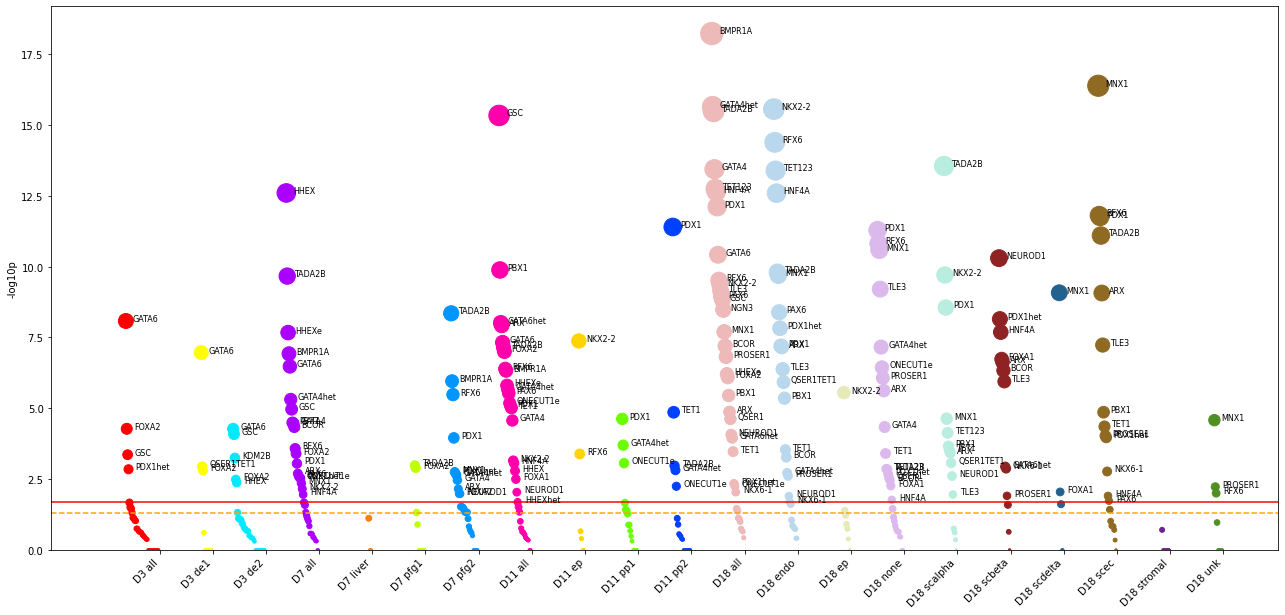

In [39]:
colors = ["#FF0000", "#FFFF00", "#00EAFF", "#AA00FF", "#FF7F00", "#BFFF00", "#0095FF", "#FF00AA", "#FFD400", "#6AFF00", 
          "#0040FF", "#EDB9B9", "#B9D7ED", "#E7E9B9", "#DCB9ED", "#B9EDE0", "#8F2323", "#23628F", "#8F6A23", "#6B238F", 
          "#4F8F23"]

fig = plt.figure(figsize =(22,10))
xtop_mids = []
size_mult = 3
spacing = 60
annot_spacing = 8
annotfont_size = 8

counter = 0
for en, c in enumerate(ordered_labels):
    last_annot = []
    ct_df = ordered_t2d[ordered_t2d["ct"]==c]
    x_values = [i for i in range(spacing*counter, spacing*(counter+1))]
    y_values = list(ct_df["neglog10P"])
    y_values = [-1 for i in range(spacing-len(y_values))] + y_values
    ko_values = list(ct_df["ko"])
    ko_values = ["" for i in range(spacing-len(ko_values))] + ko_values
    plt.scatter(x_values, y_values, s=list((np.array(y_values)+0.2)*size_mult**size_mult), color=colors[en])
    for en, y in enumerate(y_values):
        if y >= -np.log10(fdr_threshold):
            plt.annotate(ko_values[en], (annot_spacing+x_values[en], y), fontsize=annotfont_size)
    mid = (ct_df.index[0] + ct_df.index[0]+len(ct_df))/2
    xtop_mids.append(spacing*(counter+1))
    counter += 1

plt.ylim(0)
plt.ylabel("-log10p")
plt.axhline(y = -np.log10(fdr_threshold), color = 'r', linestyle = '-') 
plt.axhline(y = -np.log10(0.05), color = 'orange', linestyle = '--') 
labels = ordered_labels
labels = [l if len(l.split("_")) > 3 else l+"_all" for l in labels]
labels = [l.split("_")[0]+" "+l.split("_")[-1] for l in labels]
plt.xticks(xtop_mids, labels, rotation=45, ha="right")
plt.show()
#plt.savefig(f"/lila/home/fabihat/msk_labwork/20231112_dingyu/all_days_celltypes_{name}_phewas_descending.png", bbox_inches="tight", dpi=900)